# Time Series Prediction usin RNNs

Prediction of a repeating random pattern of booleans

In [1]:
import nerve
import numpy as np
import matplotlib.pyplot as plt

### Creating Data

Generating a periodic binary wave of time period = 10, and number of periods = 20

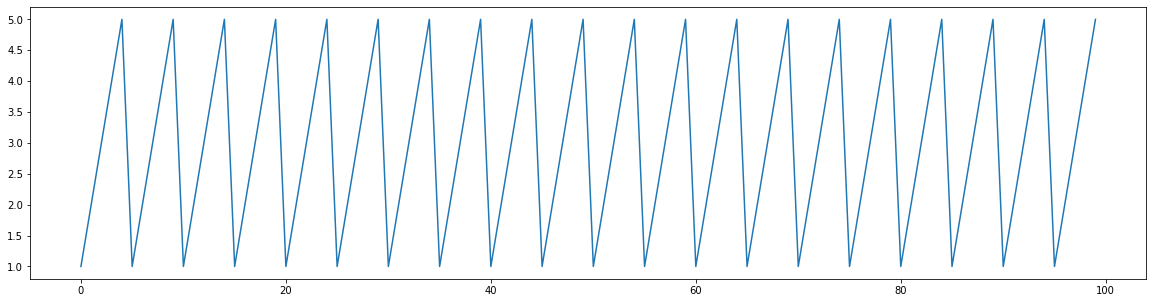

In [2]:
# one_t = np.random.choice([0,1], 10)
# time_series = np.array([*one_t]*20)
time_series = np.array([1,2,3,4,5]*20)
plt.figure(figsize=(20,5))
plt.plot(time_series)

In [3]:
X, y = [], []
shift = 2
for i in range(len(time_series)-shift):
    X.append(time_series[i:i+shift].copy())
    y.append(time_series[i+shift].copy())  # For ts = i:i+10, we target to predict value at i+11
dataset = nerve.data.Dataset(np.array(X), np.array(y).reshape(-1,1))

In [4]:
dataset.X[0]

array([1, 2])

### Build and Train a recurrent neural network

In [5]:
inner_network = nerve.Network(layers = [
    nerve.layers.Input(1),
    nerve.layers.Dense(5, bias=False),
])
rnn = nerve.Network(layers=[
    nerve.layers.Input(2),
    nerve.layers.RNN(inner_network),
    nerve.layers.Dense(1, bias=True),
    nerve.layers.Relu()
])
rnn

[3]Input(2)
[4]RNN(5) <- Recurrent
[5]Dense(1)
[6]Relu

In [6]:
loss = nerve.loss.rmse
optimizer = nerve.optimizers.GradientDescentOptimizer(0.1)
rnn.prepare(loss, optimizer, epochs=20)

In [7]:
loss = rnn.train(dataset)

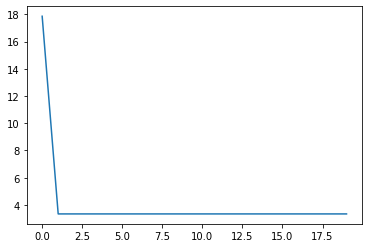

In [8]:
plt.plot(loss)

### Notes:

Not great! Need to find a weekend to fix it.